# Assignment: Classification

Classification refers to categorizing the given data into classes. For example,
- Given an image of hand-written character, identifying the character (multi-class classification)
- Given an image, annotating it with all the objects present in the image (multi-label classification)
- Classifying an email as spam or non-spam (binary classification)
- Classifying a tumor as benign or malignant and so on

In this assignment, we will be building a classifier to classify emails as spam or non-spam. We will be using the Kaggle dataset [Spam or Not Spam Dataset](https://www.kaggle.com/datasets/ozlerhakan/spam-or-not-spam-dataset?resource=download) for this task. 

**Note**: You cannot load any libraries other than the mentioned ones.




### Data pre-processing
The first step in every machine learning algorithm is to process the raw data in some meaningful representations. We will be using the [Bag-of-Words](https://towardsdatascience.com/a-simple-explanation-of-the-bag-of-words-model-b88fc4f4971) representation to process the text. It comprises of following steps:

- Process emails line-by-line to extract all the words.
- Replace extracted words by their stem (root) word. This is known as stemming and lematization.
- Remove stop words like and, or, is, am, and so on.
- Assign a unique index to each word. This forms the vocabulary.
- Represent each email as a binary vector of length equal to the size of the vocabulary such that the $i^{th}$ element of the vector is 1 iff the $i^th$ word is present in the email.

Here we provide you with the function signature along with the expected functionality. You are expected to complete them accordingly. 

In [ ]:
import numpy as np
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# takes an email as an argument
# read email line-by-line and extract all the words
# return list of extracted words
def read_email(email):
    words = list(set(email.split()))        # Set used for uniqueness
    return words
  
# takes a list of words as an argument
# replace each word by their stem word
# return list of stem words
def stemming(words):
    stemmer = PorterStemmer()
    stem_words = [stemmer.stem(word) for word in words]
    return stem_words

# takes a list of stem-words as an argument
# remove stop words
# return list of stem words after removing stop words
def remove_stop_words(stem_words):
    stop_words = set(stopwords.words('english'))
    stem_no_stop_words = set()              # Set used for uniqueness
    for word in stem_words:
        if word not in stop_words:
            stem_no_stop_words.add(word)
    stem_no_stop_words = list(stem_no_stop_words)
    return stem_no_stop_words

# takes a list of stem-words as an argument
# add new words to the vocabulary and assign a unique index to them
# returns new vocabulary
def build_vocabulary(stem_words, vocab):
    vocab = list(set(stem_words+vocab))     # Set used for uniqueness
    return vocab

# takes a list of stem-words and vocabulary as an argument
# returns bow representation
def get_bow(stem_words, vocab):
    unique_words = set(stem_words)
    email_bow = [0] * (len(vocab))
    for word in unique_words:
        email_bow[vocab.index(word)] = 1
    return email_bow

# read the entire dataset
# convert emails to bow and maintain their labels
# call function text_to_bow()
def read_data():
    # Reading and storing the emails and labels
    emails, labels = [], []
    with open("spam_or_not_spam.csv", 'r', encoding='utf-8') as f:
        first_line = 1
        for line in f:
            if not first_line:
                l = line.split(',')
                for i in l:     # Ignoring any entry with at least one empty column
                    if not i:
                        break
                else:
                    emails.append(l[0])
                    labels.append(int(l[1]))
            else:
                first_line = 0

    # Building vocabulary and converting mails into stemmed words without stop words
    new_mails, vocab = [], []
    for mail in emails:
        words = read_email(mail)
        stem = stemming(words)
        rem_stop = remove_stop_words(stem)
        new_mails.append(rem_stop)
        vocab = build_vocabulary(rem_stop, vocab)

    # Converting emails into their BOW representation
    bow_rep = []
    for mail in new_mails:
        bow = get_bow(mail, vocab)
        bow_rep.append(bow)

    # Putting it all together
    data = [np.array(bow_rep), np.array(labels), vocab]
    return data

data = read_data()

### Data Visualization
Let's understand the data distribution
- Visualize the frequency of word-occurence in all the emails(spam + non-spam)
- Visualize the freuency of word-occurence for spam and non-spam emails separately

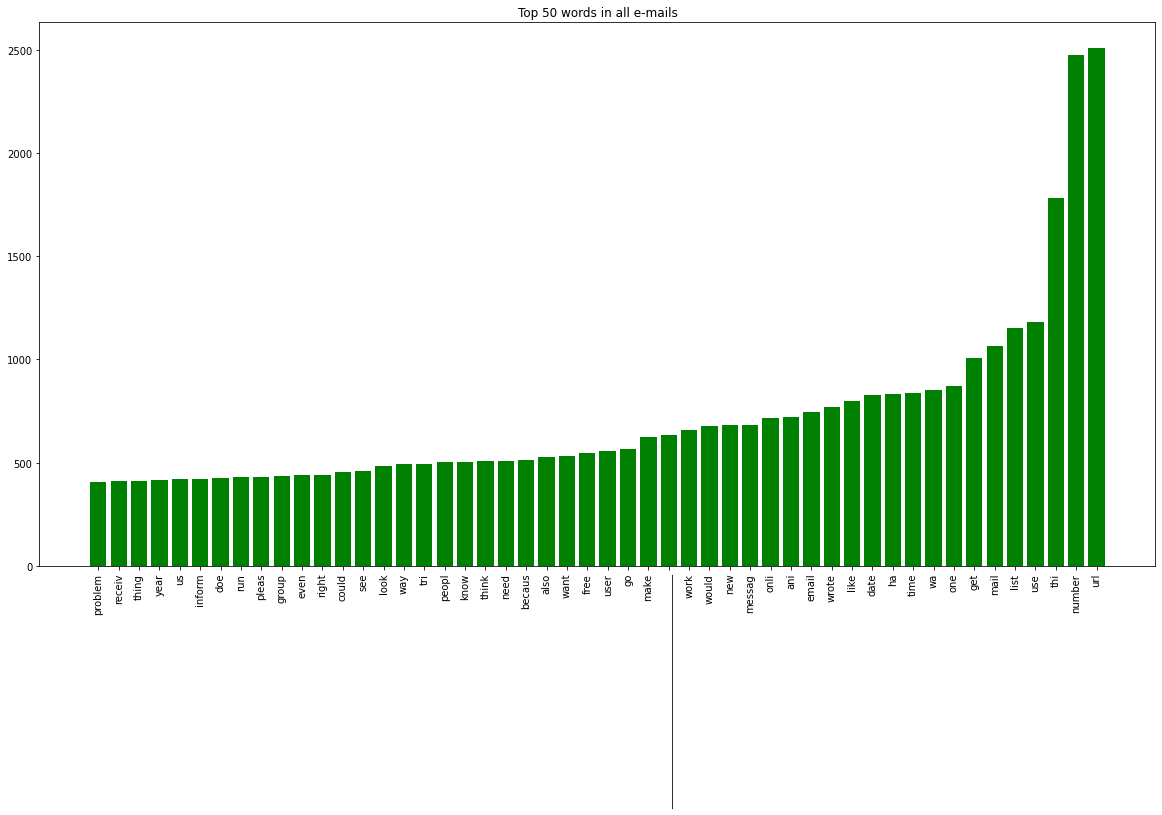

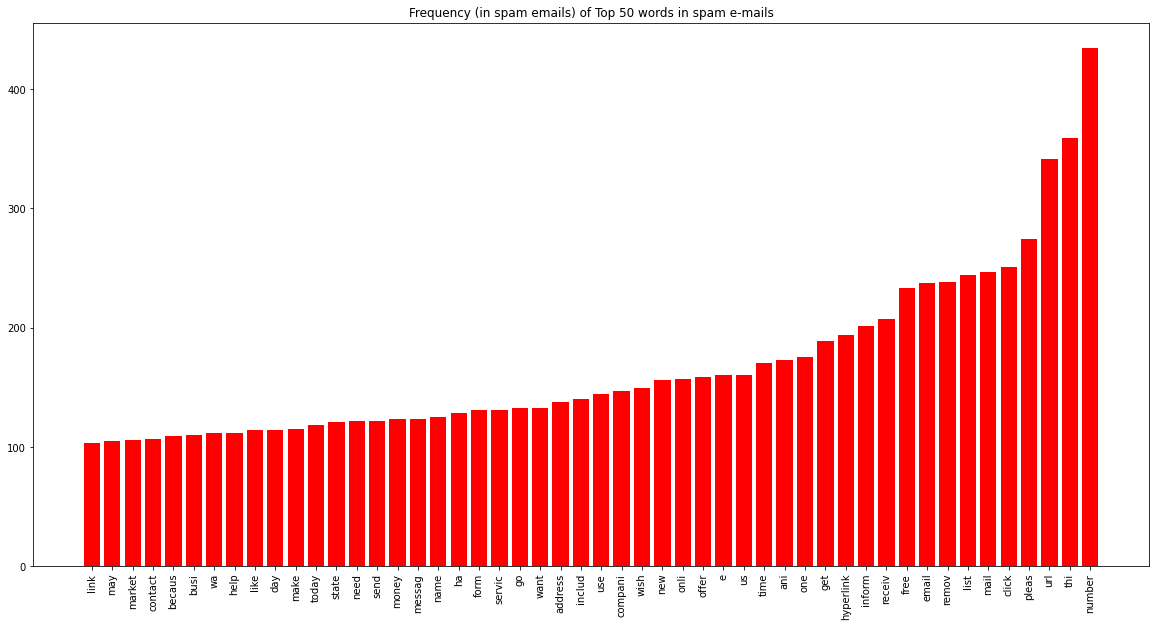

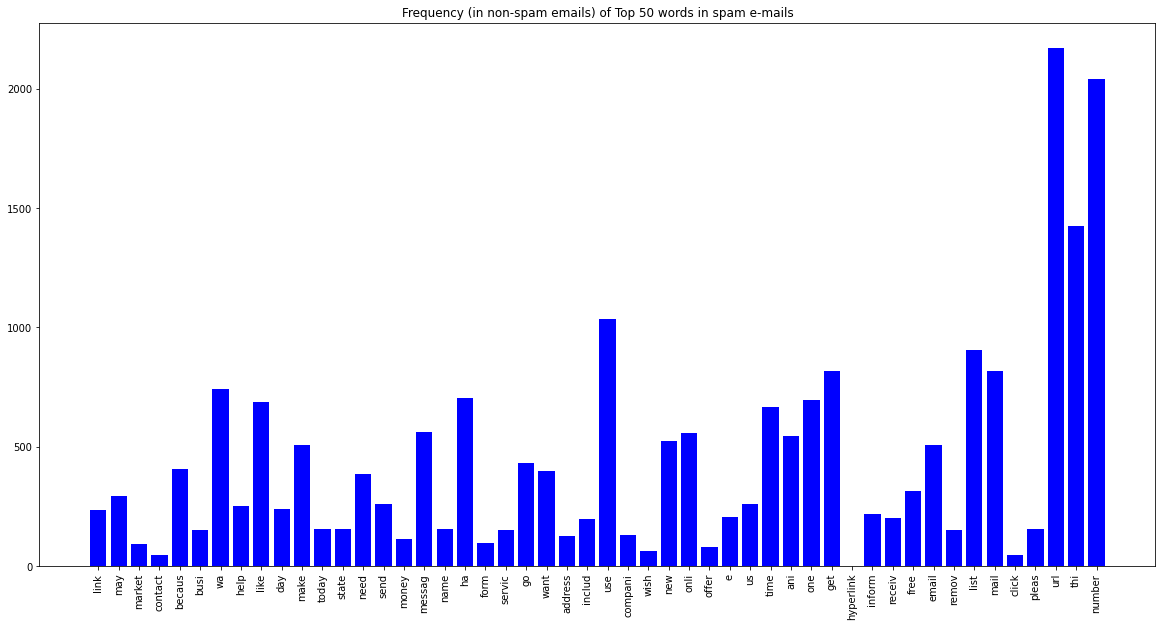

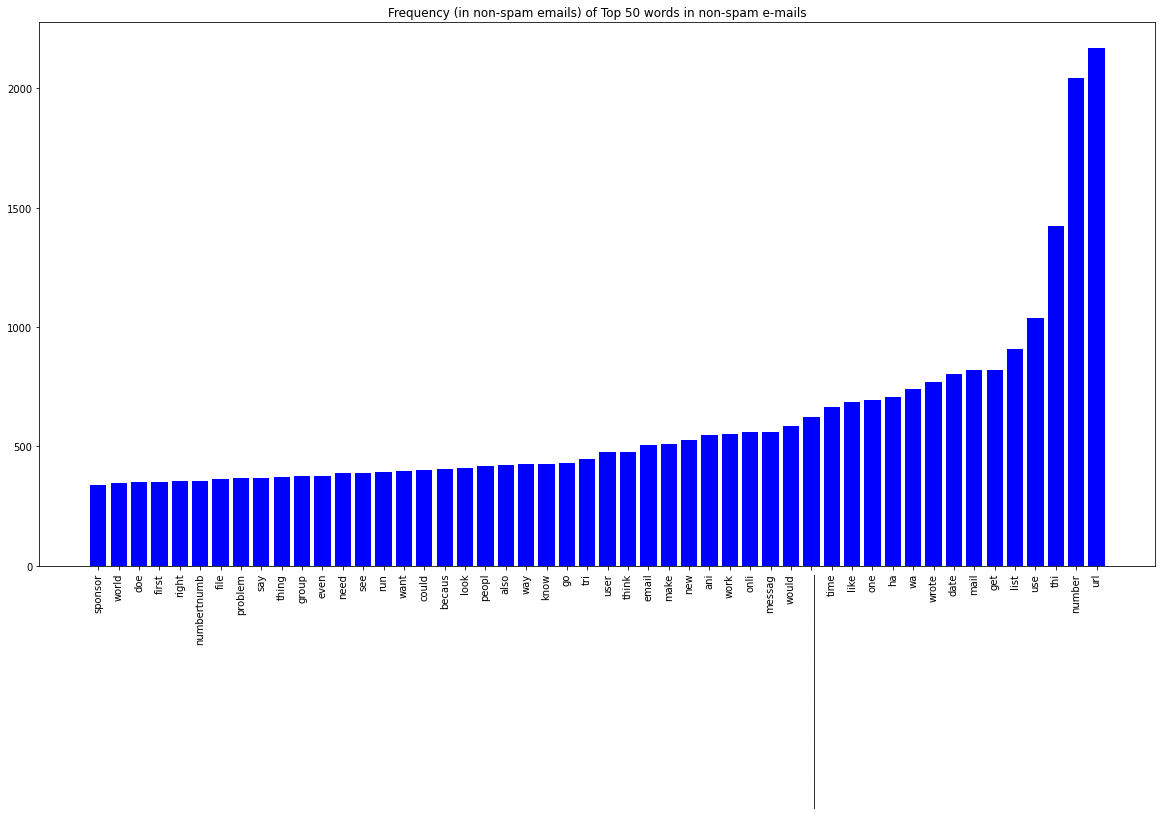

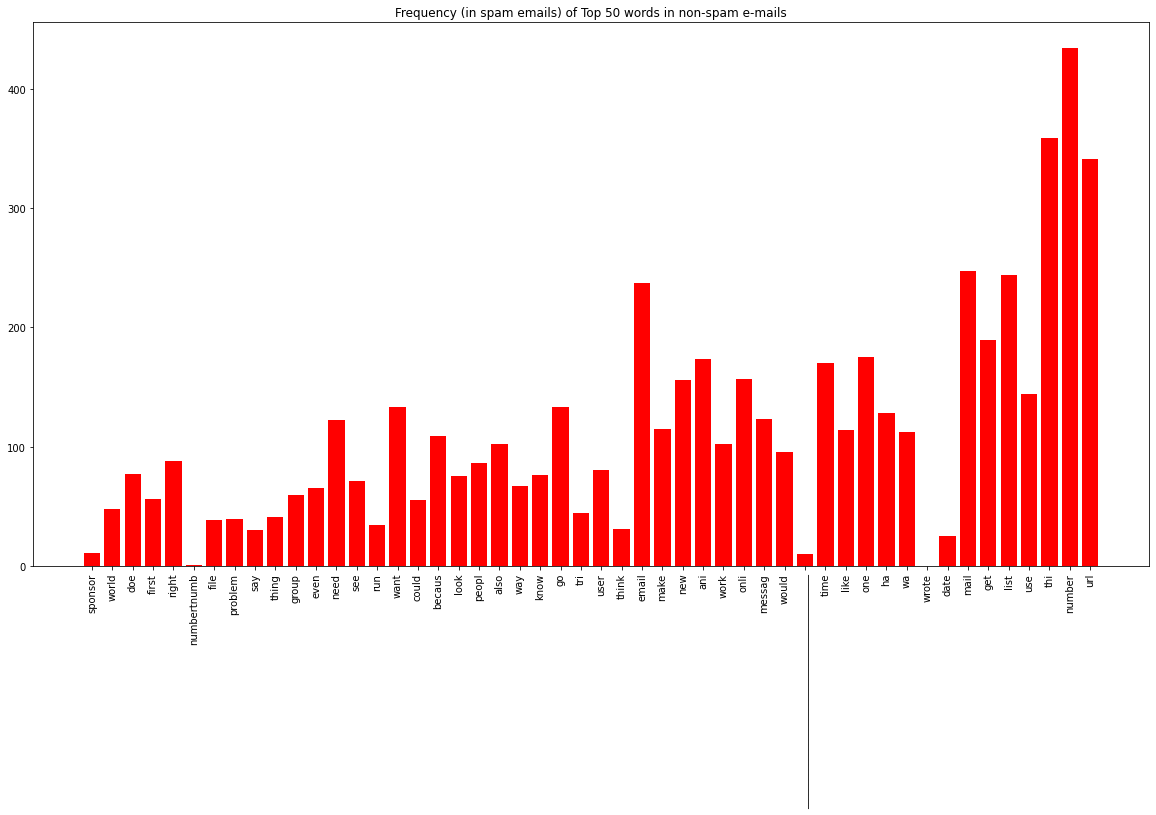

In [ ]:
import matplotlib.pyplot as plt

# visualize data distribution
def data_vis(data):
    # indices, word_freq, word = [], [], []
    # for i in range(len(data[0])):
    k = 50

    # Plotting the top k words in all e-mails
    count = [0] * len(data[2])
    for bow in data[0]:                 # Counting occurrences
        for word in range(len(bow)):
            count[word] += bow[word]
    points = []
    for i in range(len(data[2])):
        points.append(tuple([data[2][i], count[i]]))
    points.sort(key = lambda x : x[1])  # Sorting according to count
    points = points[-k:]                # Picking top k word
    words = [x[0] for x in points]
    count = [x[1] for x in points]
    plt.figure(figsize = (20, 10))      # Plotting
    plt.xticks(rotation = 'vertical')
    plt.bar(words, height = count, color = 'green')
    plt.title('Top ' + str(k) + ' words in all e-mails')
    plt.show()

    # Plotting frequencies of top k words in spam e-mails
    count = [0] * len(data[2])
    for bow in range(len(data[0])):
        if (data[1][bow]):
            for word in range(len(data[2])):
                count[word] += data[0][bow][word]   # Counting occurrences of words in spam e-mails
    points = []
    for i in range(len(data[2])):
        points.append(tuple([data[2][i], count[i]]))
    points.sort(key = lambda x : x[1])
    points = points[-k:]                # Picking top k words in spam e-mails
    words = [x[0] for x in points]
    count = [x[1] for x in points]
    plt.figure(figsize = (20, 10))      # Plotting top k words in spam e-mails
    plt.xticks(rotation = 'vertical')
    plt.bar(words, height = count, color = 'red')
    plt.title('Frequency (in spam emails) of Top ' + str(k) + ' words in spam e-mails')
    plt.show()

    count = [0] * (len(words))          # Counting occurrences (in non-spam e-mails) of top words in spam e-mails
    for bow in range(len(data[0])):
        if not (data[1][bow]):
            for word in range(len(data[2])):
                if data[2][word] in words:
                    count[words.index(data[2][word])] += data[0][bow][word]
    plt.figure(figsize = (20, 10))      # Plotting
    plt.xticks(rotation = 'vertical')
    plt.bar(words, height = count, color = 'blue')
    plt.title('Frequency (in non-spam emails) of Top ' + str(k) + ' words in spam e-mails')
    plt.show()

    # Plotting frequencies of top k words in non-spam e-mails
    count = [0] * len(data[2])
    for bow in range(len(data[0])):
        if not (data[1][bow]):
            for word in range(len(data[2])):
                count[word] += data[0][bow][word]   # Counting occurrences of words in non-spam e-mails
    points = []
    for i in range(len(data[2])):
        points.append(tuple([data[2][i], count[i]]))
    points.sort(key = lambda x : x[1])
    points = points[-k:]                # Picking top k words in non-spam e-mails
    words = [x[0] for x in points]
    count = [x[1] for x in points]
    plt.figure(figsize = (20, 10))      # Plotting top k words in non-spam e-mails
    plt.xticks(rotation = 'vertical')
    plt.bar(words, height = count, color = 'blue')
    plt.title('Frequency (in non-spam emails) of Top ' + str(k) + ' words in non-spam e-mails')
    plt.show()

    count = [0] * (len(words))          # Counting occurrences (in spam e-mails) of top words in non-spam e-mails
    for bow in range(len(data[0])):
        if (data[1][bow]):
            for word in range(len(data[2])):
                if data[2][word] in words:
                    count[words.index(data[2][word])] += data[0][bow][word]
    plt.figure(figsize = (20, 10))      # Plotting
    plt.xticks(rotation = 'vertical')
    plt.bar(words, height = count, color = 'red')
    plt.title('Frequency (in spam emails) of Top ' + str(k) + ' words in non-spam e-mails')
    plt.show()


    return

data_vis(data)

### Learn a Classifier
Split the dataset randomly in the ratio 80:20 as the training and test dataset. Use only training dataset to learn the classifier. No test data should be used during training. Test data will only be used during evaluation.

Now let us try to use ML algorithms to classify emails as spam or non-spam. You are supposed to implement [SVM](https://scikit-learn.org/stable/modules/svm.html) and [K-Nearest Neighbour](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) algorithm available in scikit-learn using the same training dataset for both.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# split dataset
def split(data):
    indices = np.arange(0, len(data[1]))
    np.random.shuffle(indices)          # Randomly use the first 80% of the data entries
    train_feat, train_label = [], []
    test_feat, test_label = [], []
    counter = 0
    for i in indices:
        if (counter<0.8*len(indices)):  # If <80% add to train data
            train_feat.append(data[0][i])
            train_label.append(data[1][i])
            counter += 1
        else:                           # Else add to test data
            test_feat.append(data[0][i])
            test_label.append(data[1][i])
    train_data = [train_feat, train_label]
    test_data = [test_feat, test_label]
    return train_data, test_data

# learn a SVM model
# use the model to make prediction
# return the model predictions on train and test dataset
def svm_classifier(train_data, test_data):
    classifier = svm.SVC()
    classifier.fit(train_data[0], train_data[1])
    train_predictions = classifier.predict(train_data[0])
    test_predictions = classifier.predict(test_data[0])
    predict_labels = [train_predictions, test_predictions]
    return predict_labels

# implement k-NN algorithm
# use the model to make prediction
# return the model predictions on train and test dataset
def knn_classifier(train_data, test_data):
    classifier = KNeighborsClassifier(n_neighbors = 4)      # 4 returned the most accuracy (except 1 and 2)
    classifier.fit(train_data[0], train_data[1])
    train_predictions = classifier.predict(train_data[0])
    test_predictions = classifier.predict(test_data[0])
    predict_labels = [train_predictions, test_predictions]
    return predict_labels

train_data, test_data = split(data)
svm_train_predictions, svm_test_predictions = svm_classifier(train_data, test_data)
knn_train_predictions, knn_test_predictions = knn_classifier(train_data, test_data)

### Model Evaluation
Compare the SVM and k-NN model using metrics
- Accuracy
- [AUC score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html)


In [ ]:
from sklearn import metrics

# compute accuracy 
def compute_accuracy(true_labels, predicted_labels):
    acc = np.sum(true_labels == predicted_labels)
    count = len(true_labels)
    acc = acc/count
    return acc

# compute AUC score 
def compute_auc(true_labels, predicted_labels):
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, predicted_labels, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    return auc

# write code to print train and test accuracy and AUC score of SVM and k-NN classifier
print("The accuracy of the SVM classifier on Train data is:", compute_accuracy(train_data[1], svm_train_predictions))
print("The accuracy of the SVM classifier on Test data is:", compute_accuracy(test_data[1], svm_test_predictions))
print("The AUC score of the SVM classifier on Train data is:", compute_auc(train_data[1], svm_train_predictions))
print("The AUC score of the SVM classifier on Test data is:", compute_auc(test_data[1], svm_test_predictions))

print("\n\nThe accuracy of the KNN classifier on Train data is:", compute_accuracy(train_data[1], knn_train_predictions))
print("The accuracy of the KNN classifier on Test data is:", compute_accuracy(test_data[1], knn_test_predictions))
print("The AUC score of the KNN classifier on Train data is:", compute_auc(train_data[1], knn_train_predictions))
print("The AUC score of the KNN classifier on Test data is:", compute_auc(test_data[1], knn_test_predictions))

The accuracy of the SVM classifier on Train data is: 0.99375
The accuracy of the SVM classifier on Test data is: 0.986644407345576
The AUC score of the SVM classifier on Train data is: 0.9816176470588236
The AUC score of the SVM classifier on Test data is: 0.956043956043956


The accuracy of the KNN classifier on Train data is: 0.9475
The accuracy of the KNN classifier on Test data is: 0.8497495826377296
The AUC score of the KNN classifier on Train data is: 0.9323175053153792
The AUC score of the KNN classifier on Test data is: 0.8572942805226271
